In [13]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio
import tensorflow
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
file_path = 'C:/Users/Dell/Desktop/audio_local/check_df_3_temp.xlsx'
df = pd.read_excel(file_path)

In [15]:
df.head()

,Path,emotion_angry,emotion_disgust,emotion_fear,emotion_happy,emotion_neutral,emotion_sad,emotion_surprise
0,/content/drive/My Drive/DATASET_1/Actor_24/03-...,False,False,False,False,False,True,False
1,/content/drive/My Drive/DATASET_1/Actor_24/03-...,True,False,False,False,False,False,False
2,/content/drive/My Drive/DATASET_1/Actor_24/03-...,False,False,False,True,False,False,False
3,/content/drive/My Drive/DATASET_1/Actor_24/03-...,False,False,True,False,False,False,False
4,/content/drive/My Drive/DATASET_1/Actor_24/03-...,False,False,True,False,False,False,False


In [16]:
import json
with open('C:/Users/Dell/Desktop/audio_local/all_features_1_10.07_2.json') as f:
    feature_data = json.load(f)

In [17]:
feature_df = pd.DataFrame(feature_data)

In [18]:
type(feature_df.iloc[0]['ftr'])

list

In [19]:
feature_df['ftr'] = feature_df['ftr'].apply(lambda x: np.array(x))

In [ ]:
feature_df['ftr'].values

In [21]:
feature_df.shape

(9605, 1)

In [22]:
emotion = pd.read_csv('C:/Users/Dell/Desktop/audio_local/emotion_upd.csv', index_col=0)

In [23]:
emotions_columns = emotion.columns
emotion[emotions_columns] = emotion[emotions_columns].astype(int)

In [25]:
emotion.head()

,emotion_angry,emotion_disgust,emotion_fear,emotion_happy,emotion_neutral,emotion_sad,emotion_surprise
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [26]:
df = pd.concat([feature_df, emotion], axis = 1)

In [59]:
# data = {
#     'a' : [1, 2, 3],
#     'b' : [10, 11, 12]
# }
# df1 = pd.DataFrame(data)
# # df1
# x = df1.values
# y = np.vstack(x)
# # x
# y

In [27]:
df.head()

,ftr,emotion_angry,emotion_disgust,emotion_fear,emotion_happy,emotion_neutral,emotion_sad,emotion_surprise
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,0,1,0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,0,0,0,0
2,"[2.9744442144874483e-05, 2.9744442144874483e-0...",0,0,0,1,0,0,0
3,"[5.869866072316654e-05, 2.3458296936895717e-13...",0,0,1,0,0,0,0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,1,0,0,0,0


In [28]:
# # now we prepare
x = np.vstack(df['ftr'].values)
y = df.drop(columns = ['ftr']).values

In [29]:
x_train, x_divide, y_train, y_divide = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_divide, y_divide, test_size=0.5, random_state=42)

In [32]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((7684, 563), (7684, 7), (960, 563), (960, 7), (961, 563), (961, 7))

In [33]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
X_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [35]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((7684, 563, 1), (7684, 7), (960, 563, 1), (960, 7), (961, 563, 1), (961, 7))

In [36]:
model = Sequential()
model.add(Conv1D(128, 5, padding='same', input_shape=(563, 1), activation='relu'))
model.add(Conv1D(128, 5, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=8, strides=8, padding='valid'))
model.add(Conv1D(128, 5, padding='same', activation='relu'))
model.add(Conv1D(128, 5, padding='same', activation='relu'))
model.add(Conv1D(128, 5, padding='same', activation='relu'))
model.add(Conv1D(128, 5, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_val, y_val))

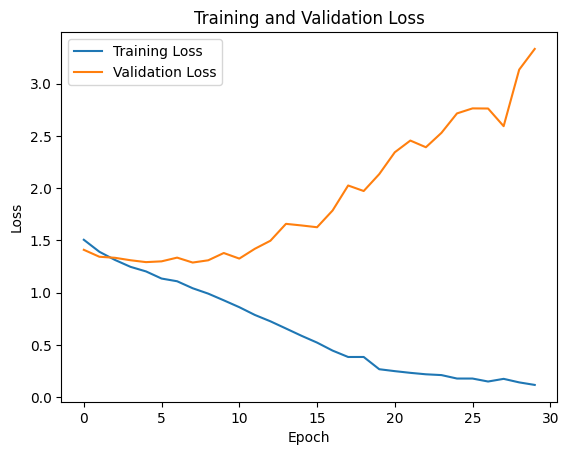

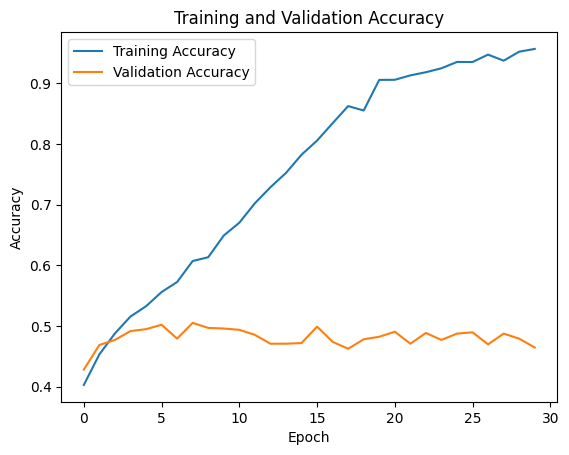

In [42]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [43]:
model_json = model.to_json()

with open('C:/Users/Dell/Desktop/audio_local/model_1_arch.json', 'w') as json_file:
    json_file.write(model_json)

In [44]:
model.save_weights('C:/Users/Dell/Desktop/audio_local/model_1_weights.h5')